# KModes

In [1]:
import pandas as pd
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import numpy as np


### Configs

In [2]:
model_config = {    'k'     : 7,
                    'init'  : 'random', #'Huang', 'Cao', 'random' 
                    'n_init' : 25,
                    'verbose' : 0,
                    'random_state' : 7
                }

## Fetch data & prepare trainingset
### Remove meaningless columns (same feature value for all languages)
- 143G
- 89A
- 90A

In [3]:
df_data = pd.read_csv('data/training_set.csv', sep=',', index_col=0) # read previously generated trainingset 
df_data = df_data.drop(['143G', '89A', '90A'], axis = 1) # remove meaningless data

rows = df_data.shape[0]
df_data.shape

(17, 31)

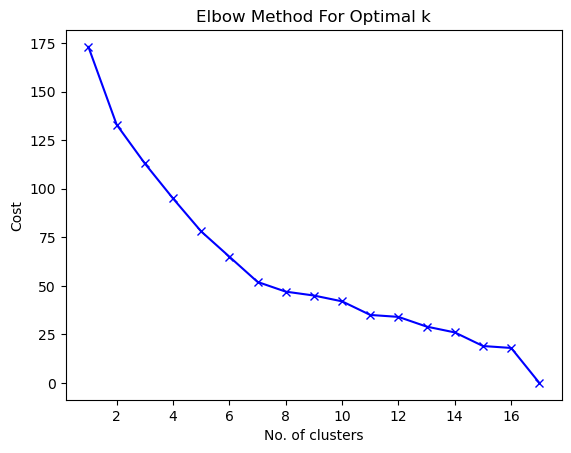

In [4]:
# Elbow curve to find optimal K
cost = []
K = range(1,rows + 1)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = model_config['init'], n_init = model_config['n_init'],
                    verbose= model_config['verbose'], random_state=model_config['random_state'])
    kmode.fit_predict(df_data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

### Train kModes model
#### Number of clusters can be taken from chart above (ellbow)

In [5]:
model_config['k'] = 7

In [6]:
# Building the model with 3 clusters
kmode = KModes(n_clusters = model_config['k'], init = model_config['init'], n_init = model_config['n_init'], 
               verbose=model_config['verbose'], random_state=model_config['random_state'])
clusters = kmode.fit_predict(df_data)
# clusters

df_result = df_data
df_result.insert(0, "Cluster", clusters, True)
df_result
# df_result.to_csv('data/result.csv')

,Cluster,53A,97A,87A,83A,82A,81A,95A,138A,112A,...,86A,96A,69A,51A,26A,72A,37A,92A,33A,101A
LANG_ID,,,,,,,,,,,,,,,,,,,,,
rus,2,7.0,3.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,...,2.0,4.0,4.0,1.0,2.0,4.0,5.0,3.0,2.0,1.0
cze,6,7.0,3.0,1.0,2.0,1.0,2.0,4.0,1.0,1.0,...,3.0,4.0,4.0,1.0,3.0,4.0,5.0,6.0,2.0,2.0
ger,3,6.0,5.0,1.0,3.0,1.0,7.0,5.0,2.0,2.0,...,2.0,5.0,2.0,1.0,2.0,4.0,1.0,6.0,2.0,1.0
iri,5,7.0,4.0,2.0,2.0,2.0,3.0,4.0,2.0,2.0,...,2.0,4.0,4.0,5.0,4.0,1.0,1.0,1.0,6.0,6.0
nor,0,7.0,3.0,1.0,2.0,1.0,2.0,4.0,2.0,2.0,...,3.0,4.0,2.0,1.0,2.0,4.0,3.0,6.0,2.0,1.0
ita,1,7.0,4.0,2.0,2.0,3.0,2.0,4.0,2.0,2.0,...,2.0,4.0,2.0,9.0,2.0,4.0,1.0,6.0,2.0,2.0
fre,1,7.0,4.0,2.0,2.0,1.0,2.0,4.0,2.0,2.0,...,2.0,4.0,2.0,7.0,2.0,4.0,1.0,1.0,2.0,1.0
fin,4,7.0,3.0,1.0,2.0,1.0,2.0,3.0,2.0,3.0,...,1.0,4.0,2.0,1.0,2.0,1.0,5.0,3.0,2.0,6.0
swe,0,7.0,3.0,1.0,2.0,1.0,2.0,4.0,2.0,2.0,...,1.0,4.0,2.0,9.0,2.0,4.0,3.0,6.0,2.0,1.0


#### Statistics about language clustes


In [7]:
df_result.groupby(['Cluster'])['Cluster'].count().sort_values()

Cluster
5    1
3    2
4    2
6    2
1    3
2    3
0    4
Name: Cluster, dtype: int64

## Visualize

In [8]:
import geopandas as gpd

df_lang = pd.read_csv('data/european_languages.csv', sep=',',index_col=0)[['Name', 'Latitude', 'Longitude']]
# df_lang
df_visu = df_result[['Cluster']].join(df_lang, how='inner')

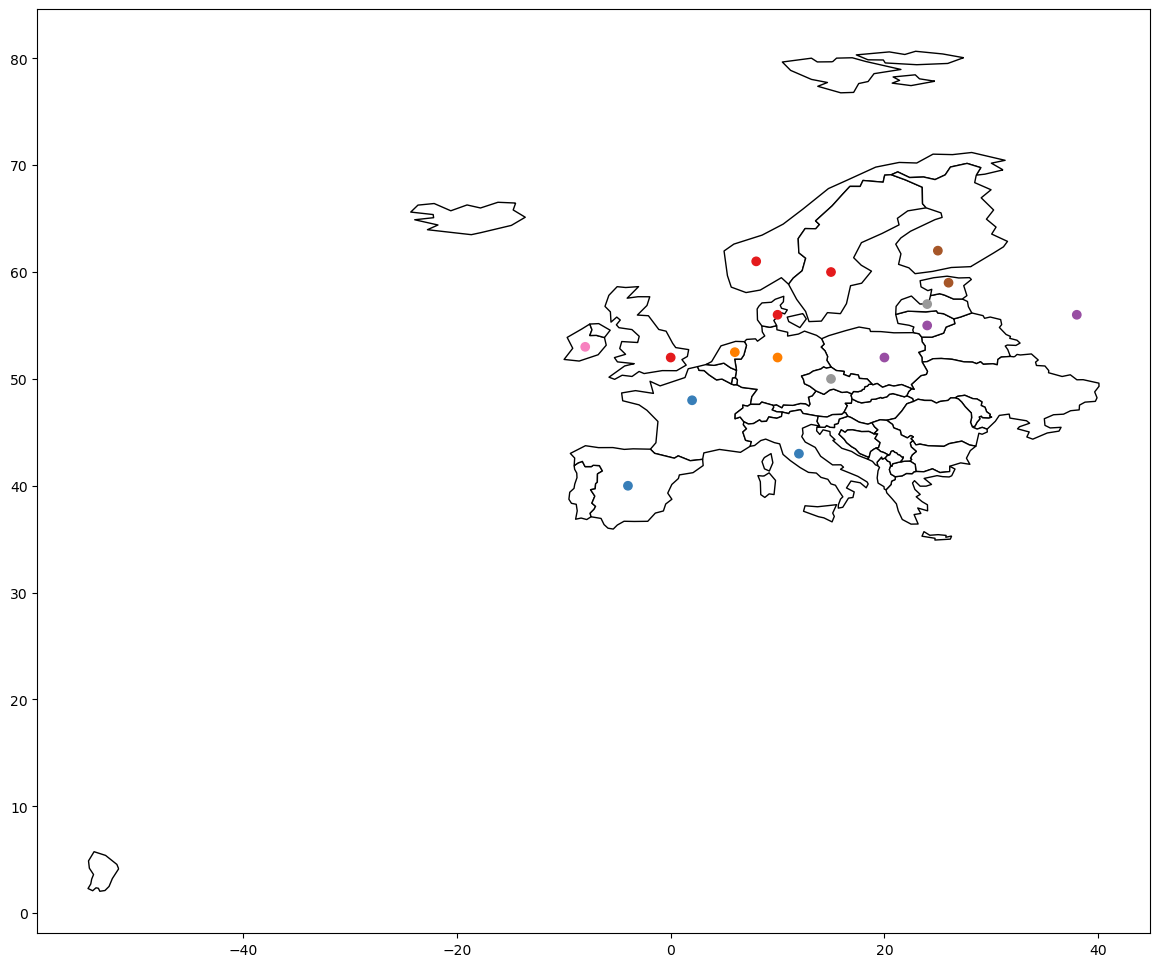

In [9]:
def draw_results():
    gdf_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    filter = ((gdf_world['continent'] == 'Europe') & (gdf_world['name'] != 'Russia')) #Asian part of Russia mess up map

    gdf = gpd.GeoDataFrame(df_visu, geometry=gpd.points_from_xy(df_visu['Longitude'], df_visu['Latitude']))

    ax = gdf_world[filter].plot(figsize=(20, 12), color='white', edgecolor='black')
    gdf.plot(column='Cluster', categorical=True, cmap='Set1', ax=ax, marker='o' )

draw_results()

# Internal Validation

## Cohesion and separation
### Cohesion
#### Principle:
Cohesion for a cluster can be computed by summating the similarity between each pair of records contained in that cluster.

In [10]:
def calc_sum_similarities(a, b):
    ret_val = 0
    for i in range(0, len(a)): #iterate thru all elements and sum up similarities
        if (a[i] == b[i]): ret_val += 1
        # print(f'{a[i]} - {b[i]} : {ret_val}')
    return ret_val

clusters = range(model_config['k'])
cohesions = []
cluster_size = []
pairs = []

for it_cluster in clusters:
    df_cluster = df_result[df_result['Cluster'] == it_cluster].iloc[:,1:] 
    cnt_langs = df_cluster.shape[0] #number of elements in cluster
    # print(cnt_langs)

    sum_similarities = 0

    if cnt_langs == 1:
        sum_similarities = np.nan #only one lang in cluster!
        sum_pairs = 0
    else:
        sum_similarities = 0
        sum_pairs = 0
        for i in range(cnt_langs):
            for j in range(i,cnt_langs):
                if (i != j): #no need to compare one language to itself
                    sum_pairs += 1
                    # print(f"compare langauge {i} ({type(i)}) to {j} ({type(j)}): {calc_sum_similarities(df_cluster.iloc[i], df_cluster.iloc[j])}")
                    sum_similarities += calc_sum_similarities(df_cluster.iloc[i], df_cluster.iloc[j])

    # print(f'cohesion for cluster #{it_cluster}: {sum_similarities}')
    cohesions.append(sum_similarities)
    cluster_size.append(cnt_langs)
    pairs.append(sum_pairs) 

dict_cont = { 'Cluster' : clusters, 'Cohesion' : cohesions, 'Clustersize' : cluster_size, 'Pairs' : pairs }
             
df_cohesion = pd.DataFrame(dict_cont)
df_cohesion = df_cohesion.set_index('Cluster')

df_cohesion['Avg_Cohesian_per_Pair'] = df_cohesion['Cohesion'] / df_cohesion['Pairs']

df_cohesion


,Cohesion,Clustersize,Pairs,Avg_Cohesian_per_Pair
Cluster,,,,
0,160.0,4,6,26.666667
1,69.0,3,3,23.000000
2,66.0,3,3,22.000000
3,29.0,2,1,29.000000
4,26.0,2,1,26.000000
5,NaN,1,0,NaN
6,23.0,2,1,23.000000


### Separation
#### Principle
- Calculate centroid for each cluster
- Calculate hamming distance of cluster to centroids of other cluster

#### Centroid
Centroids can taken from kModes' trained model. Distance in a categorical model is Hamming distance (as Euclidian distance is not applicable)

In [11]:
df_centroids = pd.DataFrame(kmode.cluster_centroids_, columns= df_result.columns[1:])
df_centroids

,53A,97A,87A,83A,82A,81A,95A,138A,112A,85A,...,86A,96A,69A,51A,26A,72A,37A,92A,33A,101A
0,7.0,3.0,1.0,2.0,1.0,2.0,4.0,2.0,2.0,2.0,...,1.0,4.0,2.0,1.0,2.0,4.0,3.0,6.0,2.0,1.0
1,7.0,4.0,2.0,2.0,3.0,2.0,4.0,2.0,2.0,2.0,...,2.0,4.0,2.0,9.0,2.0,4.0,1.0,6.0,2.0,2.0
2,7.0,3.0,1.0,2.0,1.0,2.0,4.0,3.0,2.0,2.0,...,2.0,4.0,2.0,1.0,2.0,4.0,5.0,1.0,2.0,1.0
3,6.0,5.0,1.0,3.0,1.0,7.0,5.0,2.0,2.0,2.0,...,2.0,5.0,2.0,1.0,2.0,4.0,1.0,6.0,2.0,1.0
4,7.0,3.0,1.0,2.0,1.0,2.0,3.0,2.0,2.0,1.0,...,1.0,4.0,2.0,1.0,2.0,1.0,5.0,3.0,2.0,2.0
5,7.0,4.0,2.0,2.0,2.0,3.0,4.0,2.0,2.0,2.0,...,2.0,4.0,4.0,5.0,4.0,1.0,1.0,1.0,6.0,6.0
6,7.0,3.0,1.0,2.0,1.0,2.0,4.0,1.0,1.0,2.0,...,1.0,4.0,4.0,1.0,3.0,4.0,2.0,1.0,2.0,1.0


In [12]:
#Calculate disimilarity aka. Hamming distance for two centroids (lines from dataframe shown above)
def calc_hamming_distance(a, b):
    ret_val = 0
    for i in range(0, len(a)):
        if (a[i] != b[i]): ret_val += 1

    return ret_val

centroids = range(0,model_config['k'])
dict_cont = {'Cluster' : centroids} #will be used to create dataframe later

for centroid_a in centroids:
    col = []
    for centroid_b in centroids:
        d = np.nan
        if (centroid_a != centroid_b):
            d = calc_hamming_distance(df_centroids.loc[centroid_a], df_centroids.loc[centroid_b])
            # print(f"Distance from centroid {centroid_a} to centroid {centroid_b} = {d}")
        col.append(d)
    dict_cont[centroid_a] = col

df_cluster_distance = pd.DataFrame(dict_cont)
df_cluster_distance = df_cluster_distance.set_index('Cluster')

df_cluster_distance

,0,1,2,3,4,5,6
Cluster,,,,,,,
0,NaN,15.0,11.0,10.0,15.0,23.0,15.0
1,15.0,NaN,12.0,17.0,15.0,16.0,20.0
2,11.0,12.0,NaN,16.0,11.0,18.0,12.0
3,10.0,17.0,16.0,NaN,21.0,25.0,22.0
4,15.0,15.0,11.0,21.0,NaN,17.0,14.0
5,23.0,16.0,18.0,25.0,17.0,NaN,19.0
6,15.0,20.0,12.0,22.0,14.0,19.0,NaN


Calculate the average distance for each centroid to all other centroids to get its separation value.

In [13]:
separation_per_centroid = df_cluster_distance.mean()
df_separation = separation_per_centroid.to_frame(name='Avg_Dist')
df_separation.index.names = ['Cluster']
# df_separation


# Summary
## Cohesion & Separation
### A set of clusters having high cohesion within the clusters and high separation between the clusters is considered to be good.

In [14]:
df_temp = df_cohesion.join(df_separation, how='inner')
df_temp.to_csv('data/foobar.csv')
df_temp

,Cohesion,Clustersize,Pairs,Avg_Cohesian_per_Pair,Avg_Dist
Cluster,,,,,
0,160.0,4,6,26.666667,14.833333
1,69.0,3,3,23.000000,15.833333
2,66.0,3,3,22.000000,13.333333
3,29.0,2,1,29.000000,18.500000
4,26.0,2,1,26.000000,15.500000
5,NaN,1,0,NaN,19.666667
6,23.0,2,1,23.000000,17.000000


## Results

In [15]:
df_result

,Cluster,53A,97A,87A,83A,82A,81A,95A,138A,112A,...,86A,96A,69A,51A,26A,72A,37A,92A,33A,101A
LANG_ID,,,,,,,,,,,,,,,,,,,,,
rus,2,7.0,3.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,...,2.0,4.0,4.0,1.0,2.0,4.0,5.0,3.0,2.0,1.0
cze,6,7.0,3.0,1.0,2.0,1.0,2.0,4.0,1.0,1.0,...,3.0,4.0,4.0,1.0,3.0,4.0,5.0,6.0,2.0,2.0
ger,3,6.0,5.0,1.0,3.0,1.0,7.0,5.0,2.0,2.0,...,2.0,5.0,2.0,1.0,2.0,4.0,1.0,6.0,2.0,1.0
iri,5,7.0,4.0,2.0,2.0,2.0,3.0,4.0,2.0,2.0,...,2.0,4.0,4.0,5.0,4.0,1.0,1.0,1.0,6.0,6.0
nor,0,7.0,3.0,1.0,2.0,1.0,2.0,4.0,2.0,2.0,...,3.0,4.0,2.0,1.0,2.0,4.0,3.0,6.0,2.0,1.0
ita,1,7.0,4.0,2.0,2.0,3.0,2.0,4.0,2.0,2.0,...,2.0,4.0,2.0,9.0,2.0,4.0,1.0,6.0,2.0,2.0
fre,1,7.0,4.0,2.0,2.0,1.0,2.0,4.0,2.0,2.0,...,2.0,4.0,2.0,7.0,2.0,4.0,1.0,1.0,2.0,1.0
fin,4,7.0,3.0,1.0,2.0,1.0,2.0,3.0,2.0,3.0,...,1.0,4.0,2.0,1.0,2.0,1.0,5.0,3.0,2.0,6.0
swe,0,7.0,3.0,1.0,2.0,1.0,2.0,4.0,2.0,2.0,...,1.0,4.0,2.0,9.0,2.0,4.0,3.0,6.0,2.0,1.0


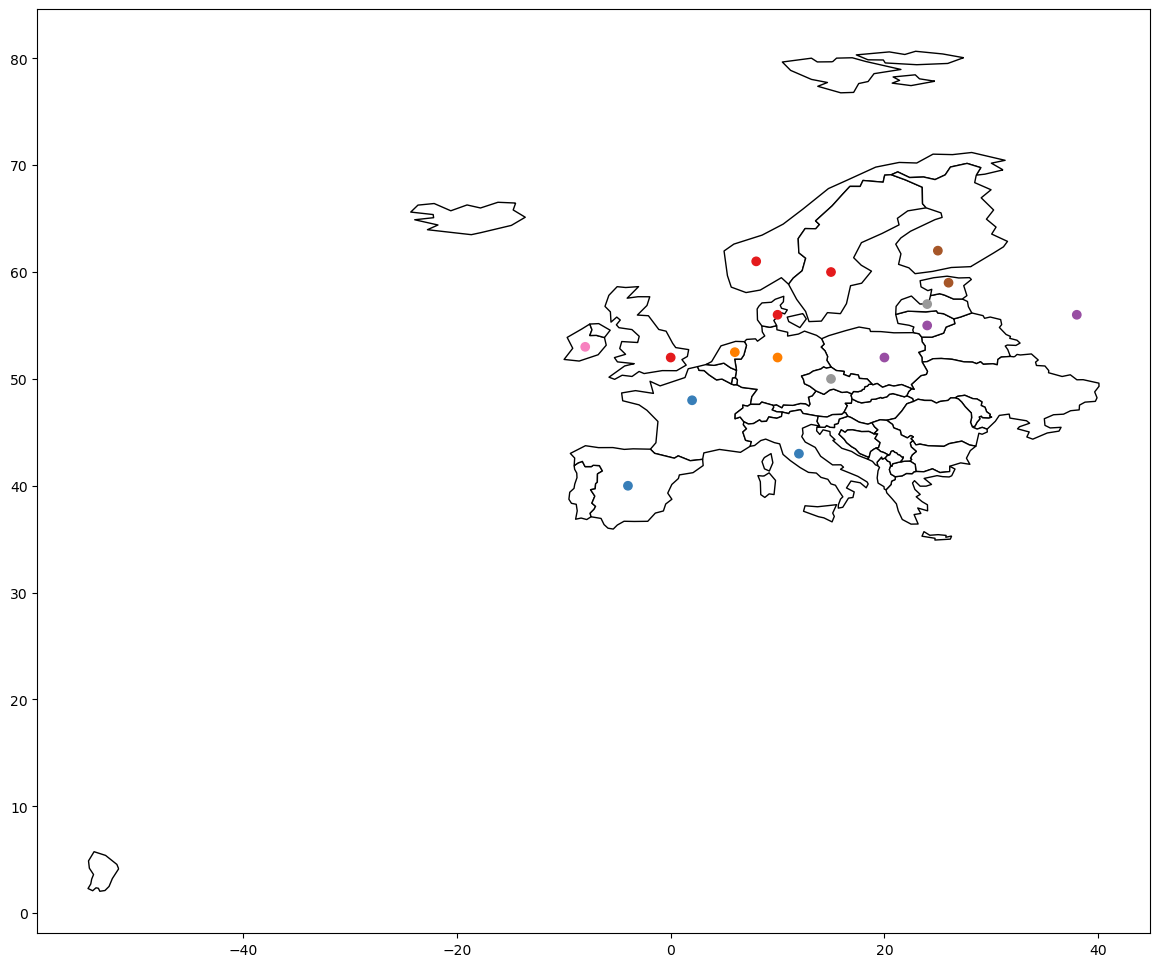

In [16]:
draw_results()